<a href="https://colab.research.google.com/github/aayush-sah/YOLO-Learnings/blob/main/YOLO11_YOLOv8%2B(1)_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#YOLO11 and YOLOv8

**Step 01: Install All the Required Packages**

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 57.5 MB/s eta 0:00:00


**Step 02: Import All the Required Libraries**

In [ ]:
from ultralytics import YOLO
from IPython.display import Image

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


**Step 03: Download Sample Image and Videos**

In [ ]:
!gdown "https://drive.google.com/uc?id=1Xa1EJO_Uwv-qr0i72VK2TaQALz7X0EP1&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1Xa1EJO_Uwv-qr0i72VK2TaQALz7X0EP1&confirm=t
To: /content/image.jpg
100% 214k/214k [00:00<00:00, 99.6MB/s]


In [ ]:
!gdown "https://drive.google.com/uc?id=1l65gM2eQMhutLP9jpySZfaQIAB_OqO2j&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1l65gM2eQMhutLP9jpySZfaQIAB_OqO2j&confirm=t
To: /content/video.mp4
100% 3.14M/3.14M [00:00<00:00, 144MB/s]


**Step 04: Object Detection on Images & Videos**

**For Images**

In [ ]:
!yolo task=detect mode=predict model=yolov8n.pt source='https://ultralytics.com/images/bus.jpg'

Ultralytics 8.3.235 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n summary (fused): 72 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs

Found https://ultralytics.com/images/bus.jpg locally at bus.jpg
image 1/1 /content/bus.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 47.3ms
Speed: 3.3ms preprocess, 47.3ms inference, 3.7ms postprocess per image at shape (1, 3, 640, 480)
Results saved to /content/runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


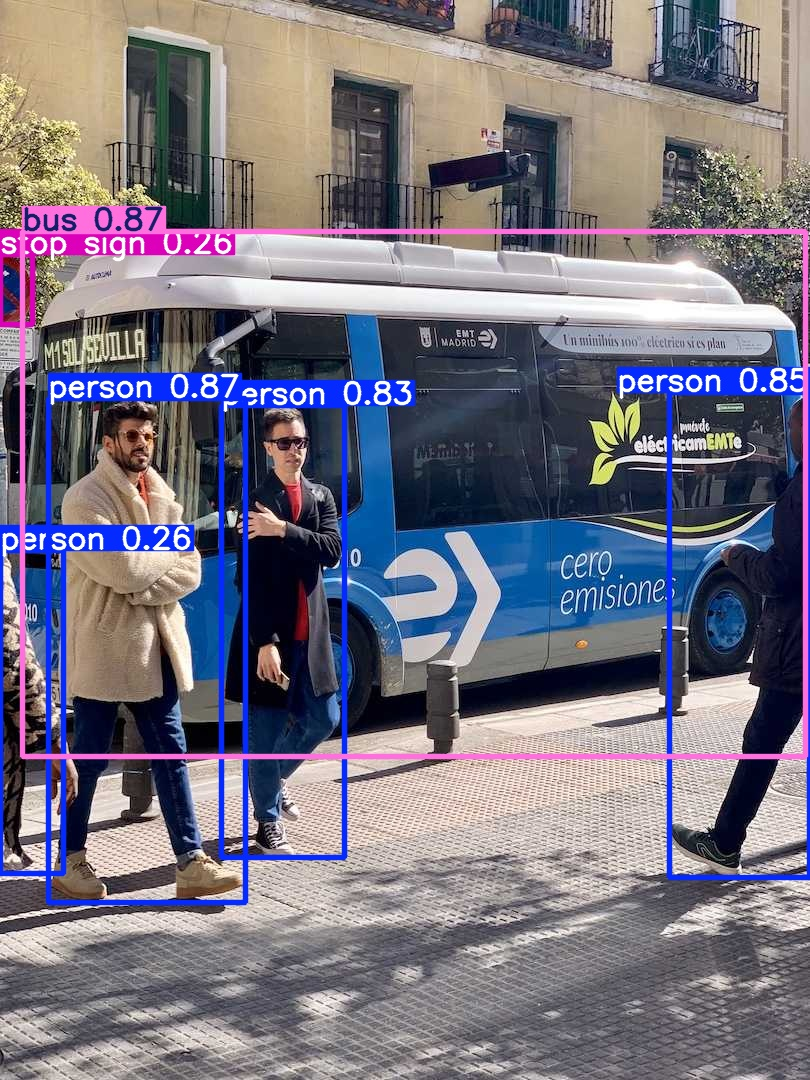

In [ ]:
Image("/content/runs/detect/predict2/bus.jpg")

In [ ]:
!yolo task=detect mode=predict model=yolov8n.pt source='/content/image.jpg'

Ultralytics 8.3.235 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n summary (fused): 72 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs

image 1/1 /content/image.jpg: 448x640 10 persons, 1 bus, 2 traffic lights, 2 backpacks, 2 handbags, 49.9ms
Speed: 3.4ms preprocess, 49.9ms inference, 9.8ms postprocess per image at shape (1, 3, 448, 640)
Results saved to /content/runs/detect/predict4
💡 Learn more at https://docs.ultralytics.com/modes/predict


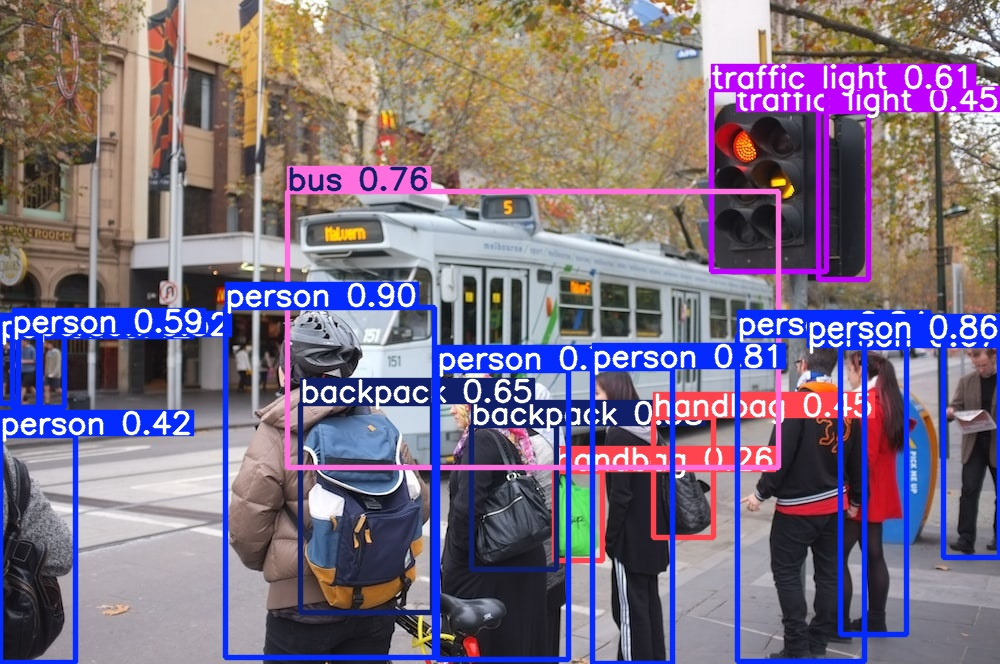

In [ ]:
Image("/content/runs/detect/predict4/image.jpg", width=600)

**For Videos**

In [ ]:
!yolo task=detect mode=predict model=yolo11n.pt source='/content/video.mp4'

Ultralytics 8.3.235 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs

video 1/1 (frame 1/458) /content/video.mp4: 384x640 10 persons, 10 bicycles, 1 handbag, 50.4ms
video 1/1 (frame 2/458) /content/video.mp4: 384x640 10 persons, 9 bicycles, 12.9ms
video 1/1 (frame 3/458) /content/video.mp4: 384x640 11 persons, 10 bicycles, 8.9ms
video 1/1 (frame 4/458) /content/video.mp4: 384x640 12 persons, 11 bicycles, 8.5ms
video 1/1 (frame 5/458) /content/video.mp4: 384x640 11 persons, 10 bicycles, 8.8ms
video 1/1 (frame 6/458) /content/video.mp4: 384x640 10 persons, 10 bicycles, 9.0ms
video 1/1 (frame 7/458) /content/video.mp4: 384x640 13 persons, 8 bicycles, 1 backpack, 8.7ms
video 1/1 (frame 8/458) /content/video.mp4: 384x640 12 persons, 8 bicycles, 8.4ms
video 1/1 (frame 9/458) /content/video.mp4: 384x640 12 persons, 8 bicycles, 8.6ms
video 1/1 (frame 10/458) /content/video.mp4: 384x640 14 persons, 

**Display the Output Video**

In [ ]:
!rm /content/result_compressed.mp4

rm: cannot remove '/content/result_compressed.mp4': No such file or directory


In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/runs/detect/predict5/video.avi'

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

**Step 05: Object Segmentation on Images & Videos**

**For Images**

In [ ]:
!yolo task=segment mode=predict model=yolov8n-seg.pt source='https://ultralytics.com/images/bus.jpg'

Ultralytics 8.3.235 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-seg summary (fused): 85 layers, 3,404,320 parameters, 0 gradients, 12.0 GFLOPs

Found https://ultralytics.com/images/bus.jpg locally at bus.jpg
image 1/1 /content/bus.jpg: 640x480 4 persons, 1 bus, 1 skateboard, 58.7ms
Speed: 5.3ms preprocess, 58.7ms inference, 15.1ms postprocess per image at shape (1, 3, 640, 480)
Results saved to /content/runs/segment/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


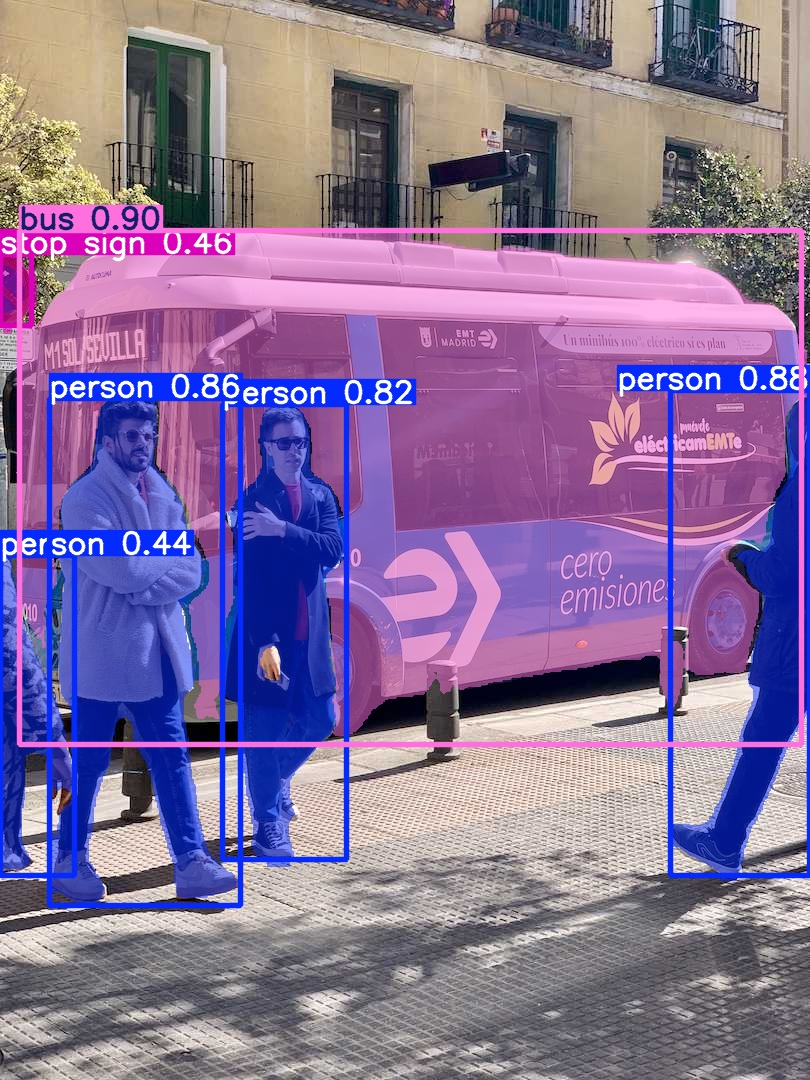

In [ ]:
Image("/content/runs/segment/predict/bus.jpg")

In [ ]:
!yolo task=segment mode=predict model=yolov8n-seg.pt source='/content/image.jpg'

Ultralytics 8.3.235 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-seg summary (fused): 85 layers, 3,404,320 parameters, 0 gradients, 12.0 GFLOPs

image 1/1 /content/image.jpg: 448x640 11 persons, 1 bus, 3 traffic lights, 5 backpacks, 3 handbags, 97.6ms
Speed: 8.5ms preprocess, 97.6ms inference, 25.7ms postprocess per image at shape (1, 3, 448, 640)
Results saved to /content/runs/segment/predict4
💡 Learn more at https://docs.ultralytics.com/modes/predict


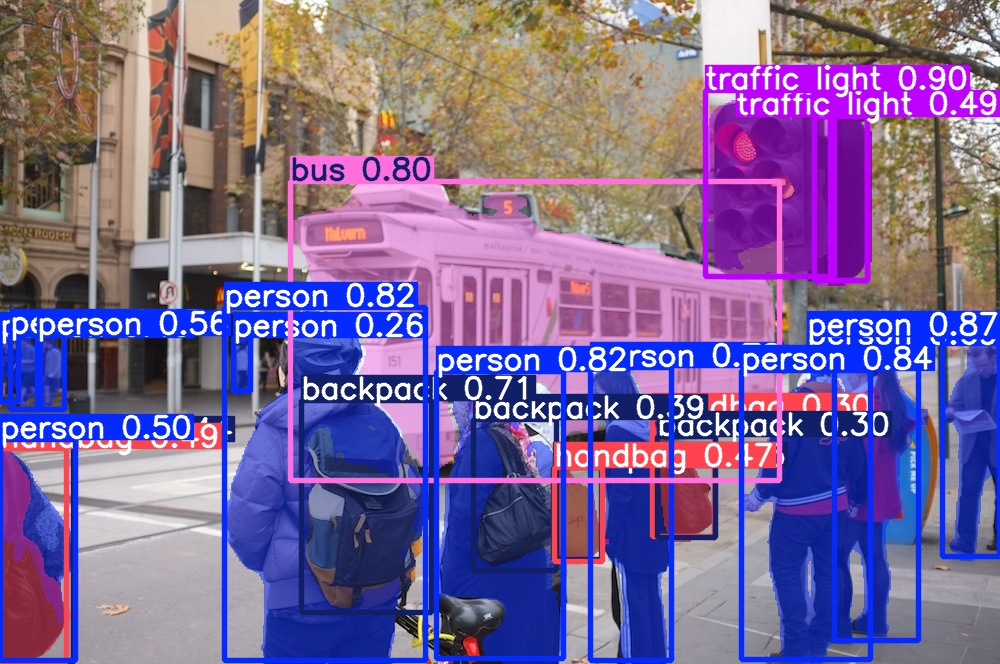

In [ ]:
Image("/content/runs/segment/predict4/image.jpg", width=600)

**For Video**

In [ ]:
!yolo task=segment mode=predict model=yolo11n-seg.pt source='video.mp4'

Ultralytics 8.3.235 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n-seg summary (fused): 113 layers, 2,868,664 parameters, 0 gradients, 9.7 GFLOPs

video 1/1 (frame 1/458) /content/video.mp4: 384x640 13 persons, 7 bicycles, 1 traffic light, 60.2ms
video 1/1 (frame 2/458) /content/video.mp4: 384x640 11 persons, 10 bicycles, 1 traffic light, 9.9ms
video 1/1 (frame 3/458) /content/video.mp4: 384x640 12 persons, 12 bicycles, 1 traffic light, 9.7ms
video 1/1 (frame 4/458) /content/video.mp4: 384x640 10 persons, 10 bicycles, 1 traffic light, 11.1ms
video 1/1 (frame 5/458) /content/video.mp4: 384x640 15 persons, 10 bicycles, 11.9ms
video 1/1 (frame 6/458) /content/video.mp4: 384x640 13 persons, 10 bicycles, 1 car, 1 traffic light, 9.8ms
video 1/1 (frame 7/458) /content/video.mp4: 384x640 15 persons, 9 bicycles, 2 traffic lights, 10.2ms
video 1/1 (frame 8/458) /content/video.mp4: 384x640 12 persons, 11 bicycles, 1 traffic light, 10.6ms
video 1/1 (frame 9/458) /content/vi

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

**Display the Output Video**

In [ ]:
!rm /content/result_compressed.mp4

In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/runs/segment/predict3/video.avi'

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

**Step 06: Pose Estimation on Images & Videos**

**For Image**

In [ ]:
!yolo task=pose mode=predict model=yolov8n-pose.pt source='/content/image.jpg'

Ultralytics 8.3.235 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-pose summary (fused): 81 layers, 3,289,964 parameters, 0 gradients, 9.2 GFLOPs

image 1/1 /content/image.jpg: 448x640 6 persons, 52.8ms
Speed: 6.1ms preprocess, 52.8ms inference, 4.3ms postprocess per image at shape (1, 3, 448, 640)
Results saved to /content/runs/pose/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


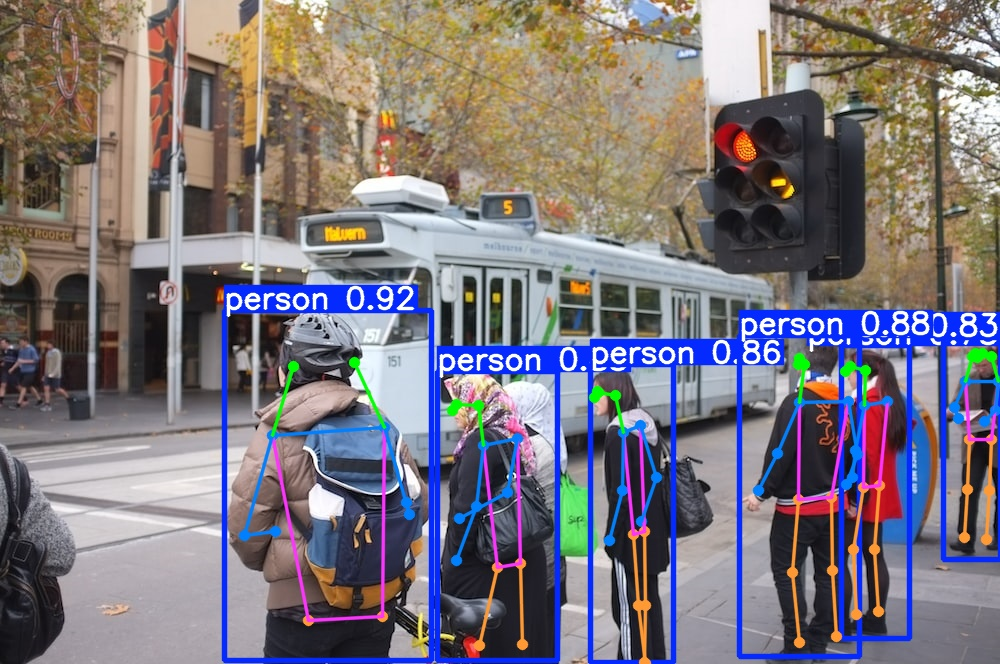

In [ ]:
Image("/content/runs/pose/predict2/image.jpg", width=600)

**For Video**

In [ ]:
!yolo task=pose mode=predict model=yolo11n-pose.pt source='/content/video.mp4'

Ultralytics 8.3.235 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n-pose summary (fused): 109 layers, 2,866,468 parameters, 0 gradients, 7.4 GFLOPs

video 1/1 (frame 1/458) /content/video.mp4: 384x640 7 persons, 56.8ms
video 1/1 (frame 2/458) /content/video.mp4: 384x640 7 persons, 10.1ms
video 1/1 (frame 3/458) /content/video.mp4: 384x640 6 persons, 9.0ms
video 1/1 (frame 4/458) /content/video.mp4: 384x640 6 persons, 9.3ms
video 1/1 (frame 5/458) /content/video.mp4: 384x640 6 persons, 10.9ms
video 1/1 (frame 6/458) /content/video.mp4: 384x640 6 persons, 10.4ms
video 1/1 (frame 7/458) /content/video.mp4: 384x640 6 persons, 9.2ms
video 1/1 (frame 8/458) /content/video.mp4: 384x640 6 persons, 13.8ms
video 1/1 (frame 9/458) /content/video.mp4: 384x640 6 persons, 9.2ms
video 1/1 (frame 10/458) /content/video.mp4: 384x640 6 persons, 8.9ms
video 1/1 (frame 11/458) /content/video.mp4: 384x640 6 persons, 9.7ms
video 1/1 (frame 12/458) /content/video.mp4: 384x640 6 persons

**Display the Output Video**

In [ ]:
!rm /content/result_compressed.mp4

In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/runs/pose/predict2/video.avi'

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

**Step 07: Image Classification**

In [ ]:
!gdown "https://drive.google.com/uc?id=14jWTZqZoDkjR-VZE7liDoeuvnYGRstzj&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=14jWTZqZoDkjR-VZE7liDoeuvnYGRstzj&confirm=t
To: /content/carImage.png
100% 579k/579k [00:00<00:00, 121MB/s]


In [ ]:
!yolo task = classify mode = predict model=yolov8x-cls.pt source='/content/carImage.png'

Ultralytics 8.3.235 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8x-cls summary (fused): 54 layers, 57,404,200 parameters, 0 gradients, 154.8 GFLOPs

image 1/1 /content/carImage.png: 224x224 sports_car 0.74, car_wheel 0.11, cab 0.10, racer 0.02, beach_wagon 0.02, 14.6ms
Speed: 6.3ms preprocess, 14.6ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
Results saved to /content/runs/classify/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


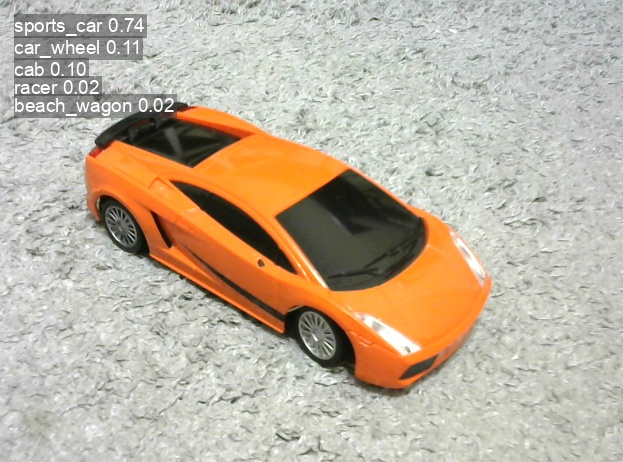

In [ ]:
Image("/content/runs/classify/predict2/carImage.jpg")

**Step 08: Oriented Bounding Boxes Object Detection**

Oriented object detection goes a step further than standard object detection by introducing an extra angle to locate objects more accurately in an image.



In [ ]:
!yolo task=obb mode=predict model=yolov8n-obb.pt source='https://ultralytics.com/images/boats.jpg'

Ultralytics 8.3.235 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-obb summary (fused): 81 layers, 3,080,144 parameters, 0 gradients, 8.3 GFLOPs

Found https://ultralytics.com/images/boats.jpg locally at boats.jpg
image 1/1 /content/boats.jpg: 576x1024 171 ships, 4 harbors, 45.9ms
Speed: 5.4ms preprocess, 45.9ms inference, 82.5ms postprocess per image at shape (1, 3, 576, 1024)
Results saved to /content/runs/obb/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


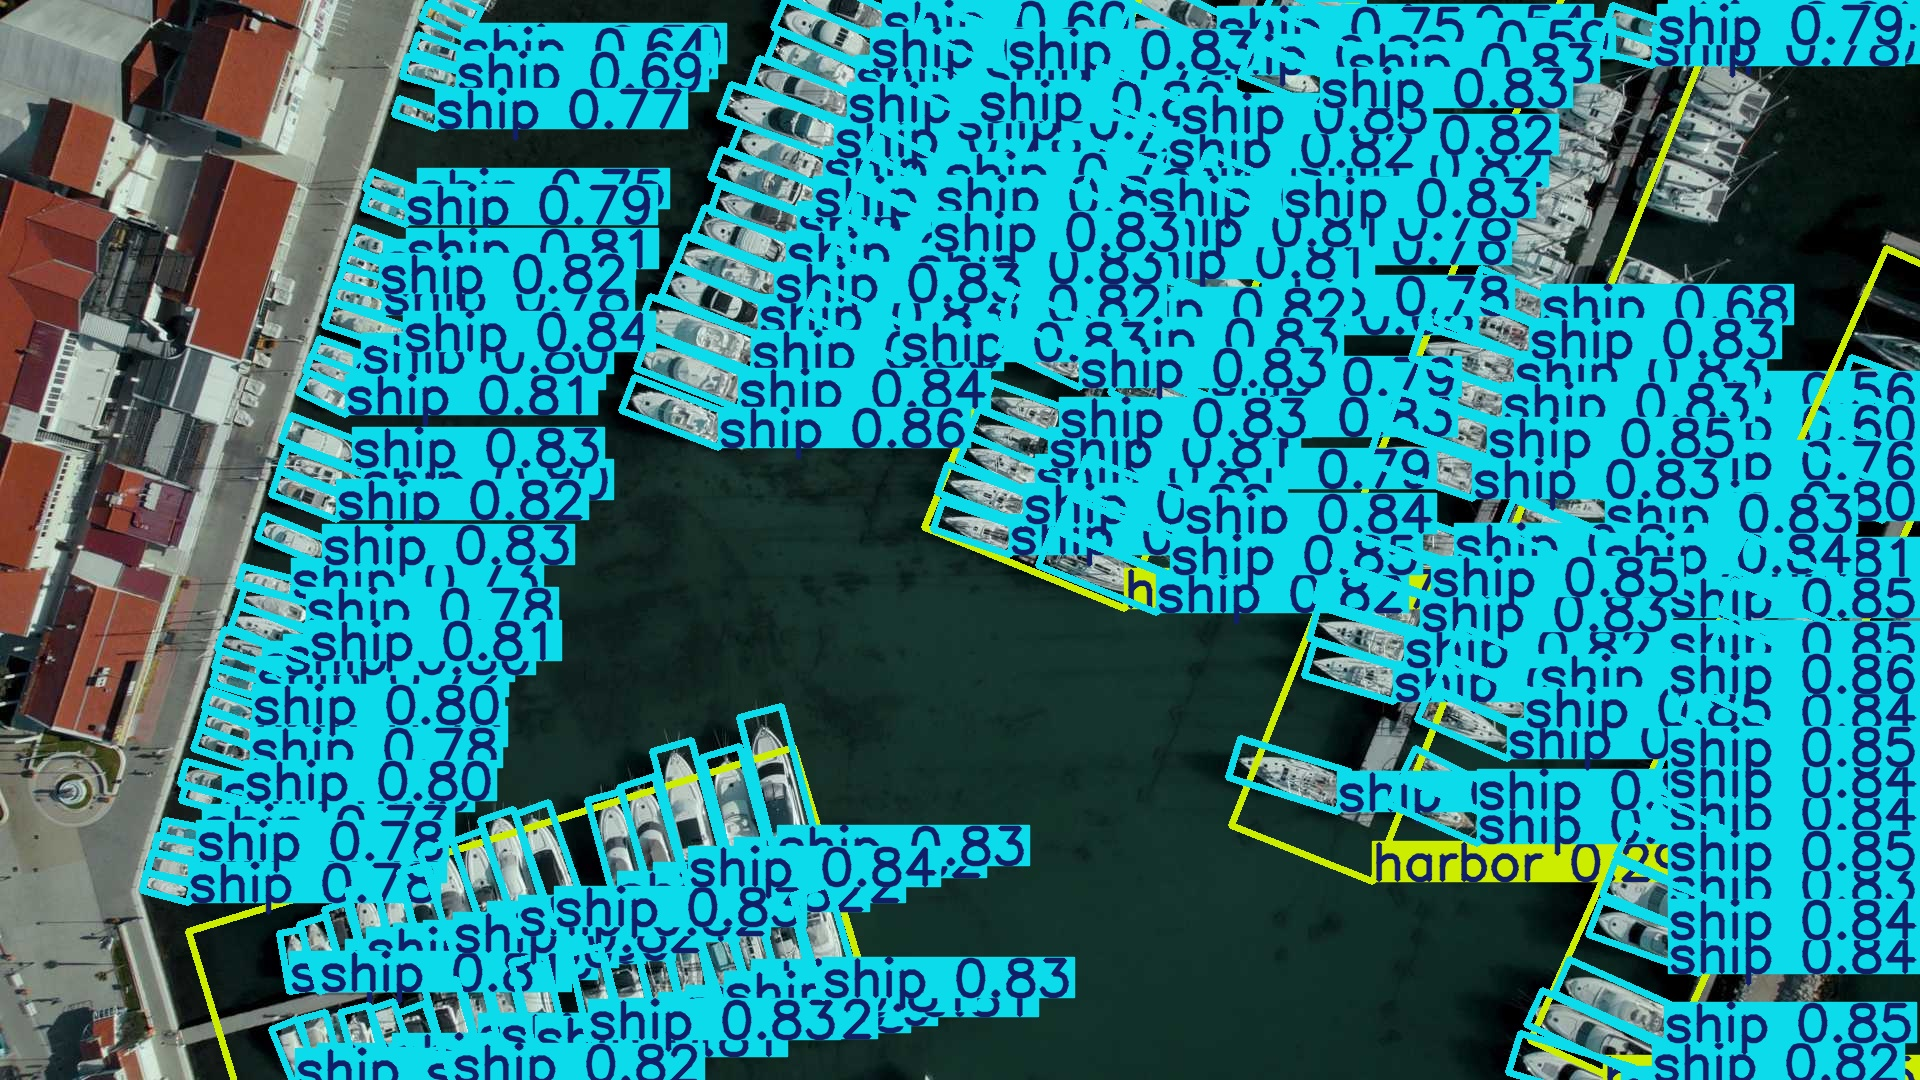

In [ ]:
Image("/content/runs/obb/predict2/boats.jpg", width=600)